In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.metrics import classification_report

In [3]:
fashion_data_train = pd.read_csv('/content/drive/MyDrive/BE Practicals/Practice Codes/fashion-mnist_train.csv')
fasion_data_train_copy = fashion_data_train.copy(deep = True)

In [4]:
fasion_data_train_copy.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fasion_data_train_copy.label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 60000 entries, 0 to 59999
Series name: label
Non-Null Count  Dtype
--------------  -----
60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


In [6]:
fashion_data_test = pd.read_csv('/content/drive/MyDrive/BE Practicals/Practice Codes/fashion-mnist_test.csv')
fasion_data_test_copy = fashion_data_test.copy(deep = True)

In [7]:
fasion_data_test_copy.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fasion_data_train_copy['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [9]:
fasion_data_train_copy['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [10]:
fasion_data_train_copy.shape

(60000, 785)

In [11]:
X_train = fasion_data_train_copy.iloc[:, 1:].to_numpy()

In [12]:
X_train = X_train.reshape([-1, 28, 28, 1])

In [13]:
X_train = X_train/255

In [14]:
y_train = fasion_data_train_copy.iloc[:, 0].to_numpy()

In [15]:
X_test = fasion_data_test_copy.iloc[:, 1:].to_numpy()

In [16]:
X_test = X_test.reshape([-1, 28, 28, 1])

In [17]:
X_test = X_test/255

In [18]:
y_test = fasion_data_test_copy.iloc[:, 0].to_numpy()

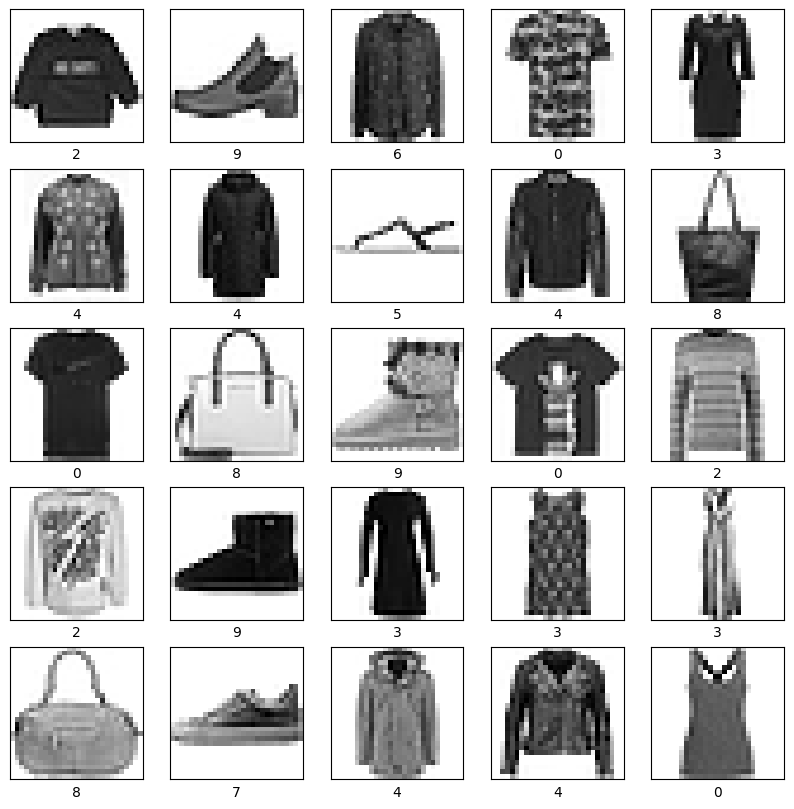

In [19]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [23]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 1200, validation_split = 0.1)

Epoch 1/50
45/45 [==============================] - 12s 30ms/step - loss: 0.9127 - accuracy: 0.6897 - val_loss: 0.5349 - val_accuracy: 0.8210
Epoch 2/50
45/45 [==============================] - 1s 24ms/step - loss: 0.4692 - accuracy: 0.8379 - val_loss: 0.4427 - val_accuracy: 0.8482
Epoch 3/50
45/45 [==============================] - 1s 24ms/step - loss: 0.4128 - accuracy: 0.8554 - val_loss: 0.4043 - val_accuracy: 0.8598
Epoch 4/50
45/45 [==============================] - 1s 26ms/step - loss: 0.3774 - accuracy: 0.8701 - val_loss: 0.3808 - val_accuracy: 0.8677
Epoch 5/50
45/45 [==============================] - 1s 28ms/step - loss: 0.3594 - accuracy: 0.8747 - val_loss: 0.3586 - val_accuracy: 0.8753
Epoch 6/50
45/45 [==============================] - 2s 33ms/step - loss: 0.3410 - accuracy: 0.8810 - val_loss: 0.3499 - val_accuracy: 0.8782
Epoch 7/50
45/45 [==============================] - 1s 30ms/step - loss: 0.3256 - accuracy: 0.8872 - val_loss: 0.3408 - val_accuracy: 0.8785
Epoch 8/50
4

In [25]:
accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2366 - accuracy: 0.9158


In [26]:
accuracy

[0.236564502120018, 0.9157999753952026]

In [27]:
y_probs = model.predict(X_test)
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[9.9934953e-01, 4.2162038e-09, 1.6639748e-04, 4.3870932e-06,
        2.8425841e-06, 1.6056592e-13, 4.6746572e-04, 4.7508131e-10,
        9.2685495e-06, 5.5143376e-11],
       [1.1133761e-07, 9.9999011e-01, 1.9395239e-08, 9.1195816e-06,
        1.1986458e-07, 1.1467209e-09, 3.6465175e-07, 6.1997907e-12,
        1.3992381e-07, 7.0754531e-09],
       [1.8873282e-02, 2.4616853e-08, 4.8328921e-01, 1.4968772e-04,
        9.7676595e-05, 9.4005936e-10, 4.9758989e-01, 3.3971397e-09,
        1.6856418e-07, 3.8849073e-08],
       [2.5914198e-02, 7.6572378e-06, 9.1718644e-01, 3.4764871e-06,
        1.3371626e-05, 7.5393989e-14, 5.6512896e-02, 3.9655968e-13,
        3.6189935e-04, 2.1599361e-12],
       [1.1906467e-06, 1.4870562e-07, 1.0212001e-03, 9.8695195e-01,
        1.1229233e-02, 6.7424777e-09, 7.9369749e-04, 2.3896571e-06,
        2.1764684e-07, 1.4716816e-08]], dtype=float32)

In [28]:
y_preds = y_probs.argmax(axis = -1)
y_preds[:5]

array([0, 1, 6, 2, 3])

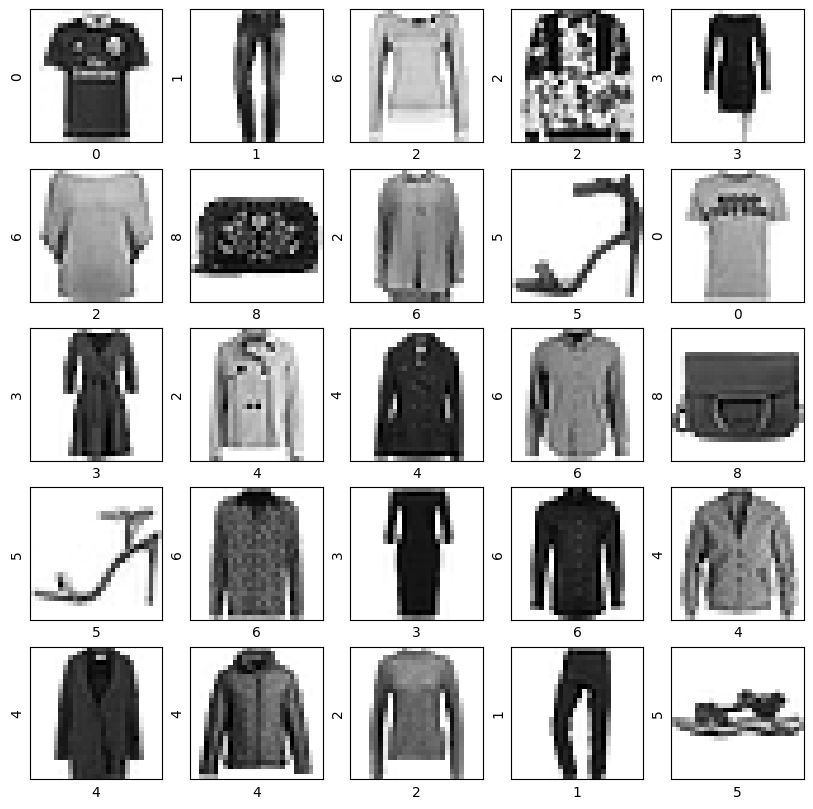

In [31]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap = plt.cm.binary)
    plt.ylabel(y_preds[i])
    plt.xlabel(y_test[i])
plt.show()

In [35]:
cr = classification_report(y_test, y_preds, target_names = [str(i) for i in range(0, 10)])
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.90      0.86      1000
           3       0.90      0.95      0.93      1000
           4       0.92      0.84      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.82      0.71      0.76      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

